In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import minimize
def f(x):
    return (x-3)**2
res = minimize(f,3)

In [4]:
res

      fun: 0.0
 hess_inv: array([[1]])
      jac: array([1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([3.])

In [5]:
res.x

array([3.])

To minimize $$ f(x,y) = (x-1)^2 +(y-2.5)^2 $$ under the constraints:
$$x-2y+2\ge0$$
$$-x-2y+6\ge0$$
$$-x+2y+2\ge0$$
$$x\ge0$$
$$y\ge0$$

In [6]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [7]:
f = lambda x: (x[0]-1)**2 + (x[1]- 2.5)**2
# defining the constraits and boundaries
#NOTE: do not forget the comma(,) while defining constraints
const = ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 2}
        )
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=const)

In [8]:
res

     fun: 3.199999999999971
     jac: array([-1.59999996, -3.19999999])
 message: 'Optimization terminated successfully'
    nfev: 9
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.2, 0.9])

In [9]:
res.x

array([0.2, 0.9])

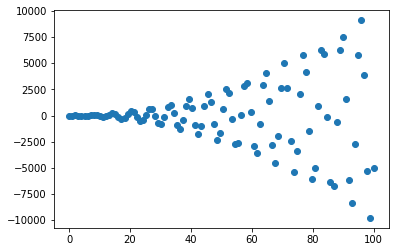

In [20]:
x = np.linspace(0, 100, 100)
y = x**2 * np.sin(x)
plt.scatter(x, y)

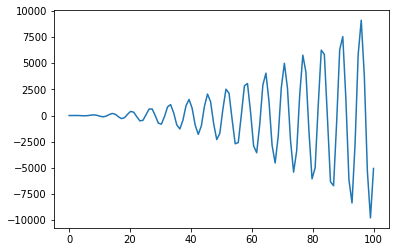

In [26]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 100, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

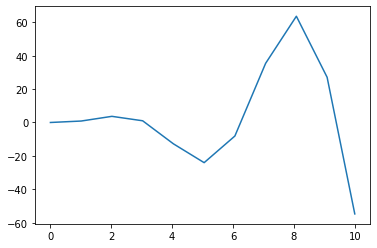

In [33]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

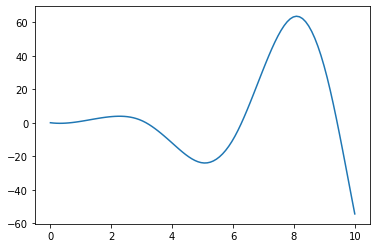

In [34]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

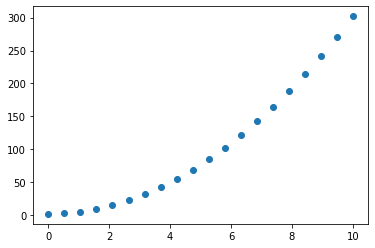

In [5]:
x_data = np.linspace(0, 10, 20)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

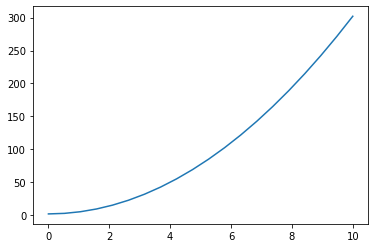

In [6]:
plt.plot(x_data, y_data)
plt.show()

The equation for spring motion is $y=Acos(\omega t+ \phi)$. We want to find the natural frequency of oscillation, that is, $\omega$ for the spring. You collect the data as follows:

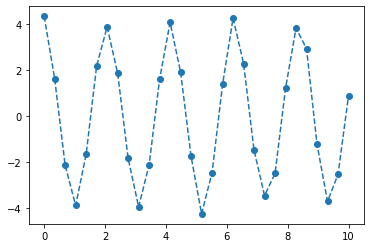

In [11]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])
plt.plot(t_data, y_data, 'o--')
plt.show()

where let us say, $\omega=2\pi f$ and $T\approx 2$ seconds. Thus a good initial guess is:
* $\omega = \pi$
* $A=4$
* $\phi = 0$

In [19]:
from scipy.optimize import curve_fit
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt


array([3.94836219, 2.99899521, 0.10411352])

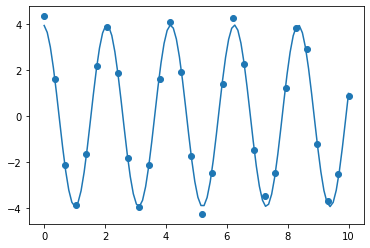

In [25]:
A, w, phi = popt
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

plt.scatter(t_data, y_data)
plt.plot(t, y)

## Calculus:
* Differentiation

In [26]:
from scipy.misc import derivative

In [27]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0, 1, 200)
 

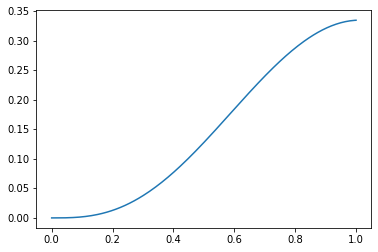

In [29]:
plt.plot(x, f(x))


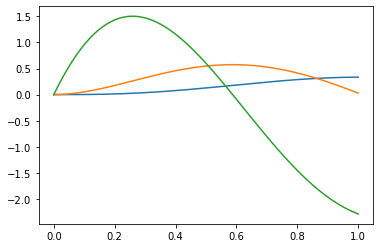

In [36]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

* Integration


Single integrals:
$$\int_{0}^{1}  x^2 \sin(2x)e^{-x}dx$$

In [38]:
from scipy.integrate import quad

In [45]:
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)


In [46]:
integral

0.14558175869954834

In [47]:
integral_error

1.6162822047366225e-15

* Double integrals:
$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2)dydx  $$

In [53]:
from scipy.integrate import dblquad

integrand = lambda x, y: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [54]:
a = np.array([[1, 3, 4], [1, 4, 6]])
a

array([[1, 3, 4],
       [1, 4, 6]])

In [56]:
a.T[0]

array([1, 1])

In [71]:
x = np.linspace(0, 1, 10)
x.T

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [72]:
import radioactivedecay as rd


In [73]:
Mo99_t0 = rd.Inventory({'Mo-99': 2.0}, 'Bq')
Mo99_t1 = Mo99_t0.decay(20.0, 'h')
Mo99_t1.activities('Bq')
{'Mo-99': 1.6207863893776937, 'Ru-99': 0.0,
 'Tc-99': 9.05304236308454e-09, 'Tc-99m': 1.3719829376710406}

{'Mo-99': 1.6207863893776937,
 'Ru-99': 0.0,
 'Tc-99': 9.05304236308454e-09,
 'Tc-99m': 1.3719829376710406}

In [74]:
Mo99_t0.cumulative_decays(20.0, 'h')

{'Mo-99': 129870.3165339939,
 'Tc-99m': 71074.31925850797,
 'Tc-99': 0.0002724635511147602}

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Time (d)', ylabel='Activity (Bq)'>)

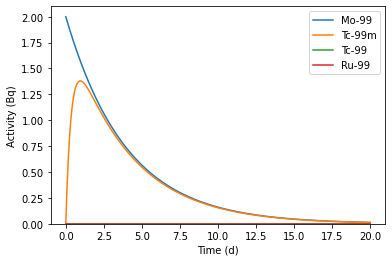

In [76]:
Mo99_t0.plot(20, 'd', yunits='Bq')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Time (d)', ylabel='Activity (Bq)'>)

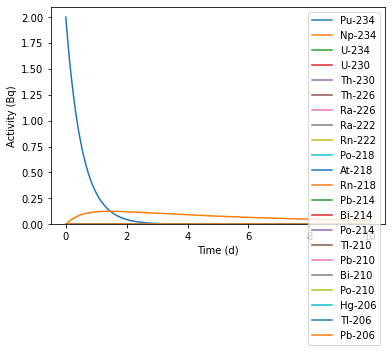

In [81]:
Pu234_t0 = rd.Inventory({'Pu-234': 2.0}, 'Bq')
Pu234_t1 = Pu234_t0.decay(10.0, 'h')
Pu234_t1.activities('Bq')
Pu234_t0.plot(10, 'd', yunits='Bq')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Time (d)', ylabel='Activity (Bq)'>)

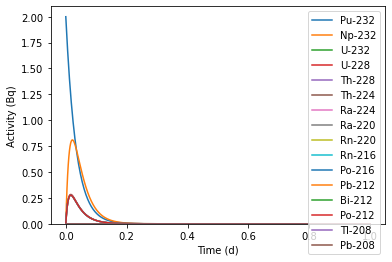

In [84]:
Pu232_t0 = rd.Inventory({'Pu-232': 2.0}, 'Bq')
Pu232_t1 = Pu234_t0.decay(10.0, 'h')
Pu232_t1.activities('Bq')
Pu232_t0.plot(1, 'd', yunits='Bq')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Activity (Bq)'>)

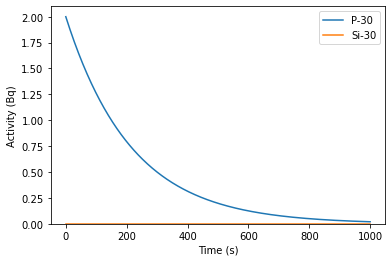

In [87]:
P30_t0 = rd.Inventory({'P-30': 2.0}, 'Bq')
P30_t1 = Pu234_t0.decay(10.0, 'h')
P30_t1.activities('Bq')
P30_t0.plot(1000, 's', yunits='Bq')

(<Figure size 756x2268 with 1 Axes>, <AxesSubplot:>)

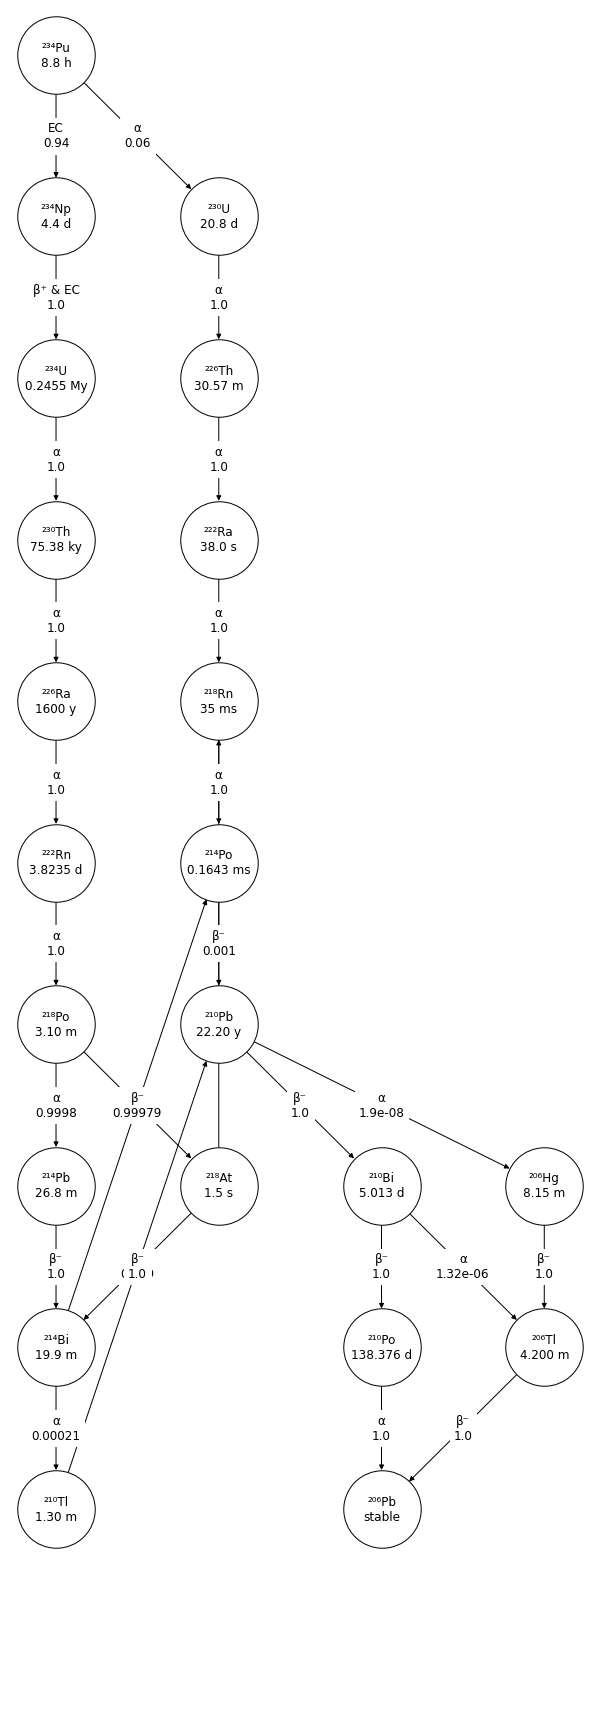

In [94]:
nuc = rd.Nuclide('Pu-234')
nuc.plot()